## Linear Regression using Gradient Descent

In this notebook, I've built a simple linear regression model using gradient descent to fit a line ($y = mx + c$) through input data consisting of ($x, y$) values. The purpose is to better understand gradient descent by calculating the gradients by hand and implementing it without using out-of-the-box libraries/ methods.

### Problem Statement

**Given a set of $x$ and $y$ values, the problem statement here is to find a line "$y = mx + b$" that best fits the data**. This involes finding the values of $m$ and $b$ that minimizes an _Error/ Loss_ function for the given dataset. We will use _Mean Squared Error (denoted as E)_ as the error function to be minimized, and it is given by - 

$E = \dfrac{1}{N} \sum_{i=1}^N (y_i - (mx_i + b))^2$

To find the optimial value of $m$ and $b$ that minimizes the error function using Gradient Descent, the values are randomly initialized first and then updated $number of steps$ times or until the error function value converges. Below equations are used to update the values of $m$ and $b$ at each step -

$
m = m - learning\_rate \times \dfrac{\partial E}{\partial m}
$

$
b = b - learning\_rate \times \dfrac{\partial E}{\partial b}
$

### Calculating Gradients for Mean Squared Error 

The Gradient Descent update formulae given above needs the partial derivatives of error function $E$ with respect to both $m$ and $b$ ($\dfrac{\partial E}{\partial m}$ and $\dfrac{\partial E}{\partial b}$ respectively). These partial derivatives are calculated as follows -

$
\begin{align}
E & = \dfrac{1}{N} \sum_{i=1}^N (y_i - (mx_i + b))^2 \\
     & = \dfrac{1}{N} \sum_{i=1}^N y_i^2 - 2y_i(mx_i + b) + (mx_i + b)^2 \\
     & = \dfrac{1}{N} \sum_{i=1}^N y_i^2 - 2x_iy_im - 2y_ib + x_i^2m^2 + 2x_imb + b^2 \\
\end{align}
$

$
\begin{align}
\dfrac{\partial E}{\partial m} & = \dfrac{1}{N} \sum_{i=1}^N 0 - 2x_iy_i - 0 + 2x_i^2m + 2x_ib + 0 \\
                                  & = \dfrac{-2}{N} \sum_{i=1}^N x_i(y_i - (mx_i + b))
\end{align}
$

$
\begin{align}
\dfrac{\partial E}{\partial b} & = \dfrac{1}{N} \sum_{i=1}^N 0 - 0 - 2y_i + 0 + 2x_im + 2b \\
                                  & = \dfrac{-2}{N} \sum_{i=1}^N (y_i - (mx_i + b))
\end{align}
$






## Implementation

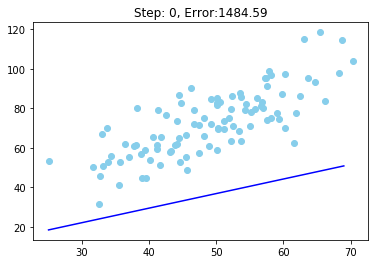

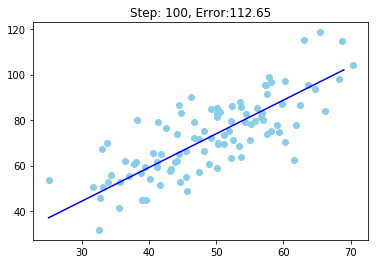

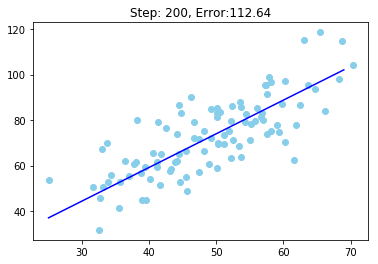

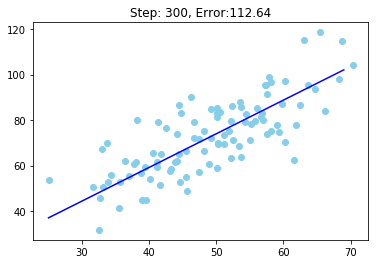

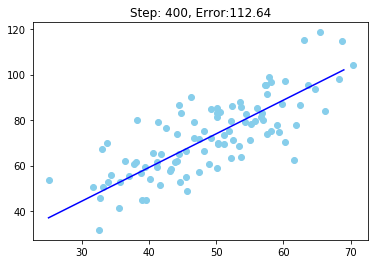

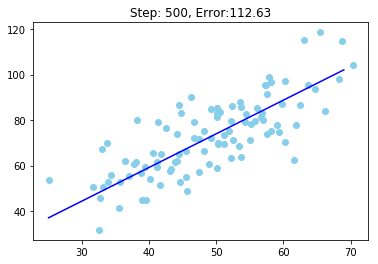

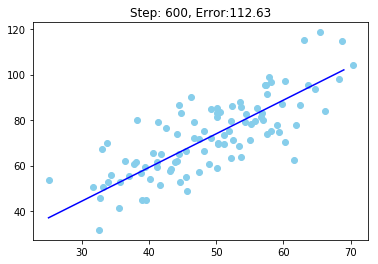

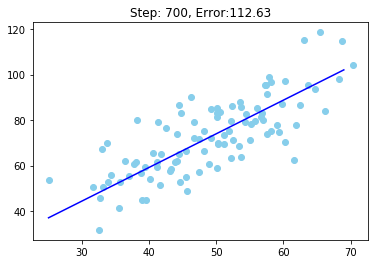

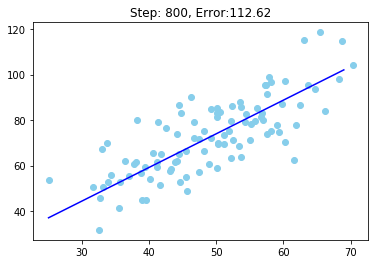

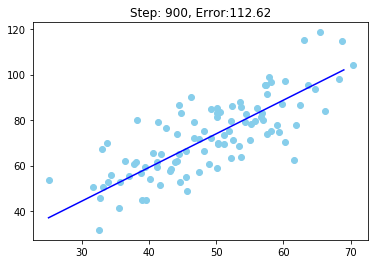

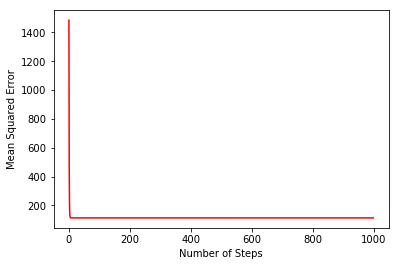

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def plot_fit(points, m, b, step, error):
    '''
    Plots a scatterplot of points, with a line defined by m and b.
    Also shows the current step number in Gradient Descent and 
    current error value.
    '''
    
    x_values = [p[0] for p in points]
    y_values = [p[1] for p in points]
    
    plt.scatter(x_values, y_values, color='skyblue')            
    fit_xvalues = list(range(int(min(x_values)), int(max(x_values))))
    fit_yvalues = [m * fit_x + b for fit_x in fit_xvalues]
    plt.plot(fit_xvalues, fit_yvalues, color='blue')
    plt.title('Step: ' + str(step) + ', Error:' + str(round(error, 2)))
    plt.show()

def mean_squared_error(points, m, b):
    '''
    Calculates Mean Squared Error for the line defined by m & b
    with the given points.
    '''
    n = len(points)
    error = 0
    
    for i in range(n):
        x_i = points[i, 0]
        y_i = points[i, 1]
        
        error += (y_i - (m * x_i + b)) **2
        
    error = float(error) / n
    
    return error

def gradient_step(points, current_m, current_b, learning_rate):
    '''
    Calculates gradients and new values for m and b based on
    current values of m and b and given learning rate.
    '''
    gradient_m = 0
    gradient_b = 0
    
    n = len(points)
    
    for i in range(n):
        x_i = float(points[i, 0])
        y_i = float(points[i, 1])
        
        gradient_m += (-2 / n) * (x_i * (y_i - (current_m * x_i + current_b)))
        gradient_b += (-2 / n) * (y_i - (current_m * x_i + current_b))
    
    new_m = current_m - learning_rate * gradient_m
    new_b = current_b - learning_rate * gradient_b
    new_error = mean_squared_error(points, new_m, new_b)
    
    return [new_m, new_b, new_error]
    
def gradient_descent(points, initial_m, initial_b, learning_rate, num_steps):
    '''
    Runs Gradient Descent for the given points, starting with the initial
    m and b values, and the given learning rate for the given number of steps.
    '''
    m = initial_m
    b = initial_b
    
    error_vec = list()
    
    # Update m and b for each gradient descent step
    for step in range(num_steps):
        
        [m, b, error] = gradient_step(points, m, b, learning_rate)

        # Plot the current fit once every 100 steps to track progress
        if not step % 100:  
            plot_fit(points, m, b, step, error)
        
        error_vec.append(error)
    
    # Plot the error function value for each step
    plt.plot(error_vec, color='red')
    plt.xlabel('Number of Steps')
    plt.ylabel('Mean Squared Error')
    plt.show()
    
    return [m, b]

def run():
    points = np.genfromtxt('data.csv', delimiter=',')
    
    initial_m = 0
    initial_b = 0
    
    learning_rate = 0.0001
    num_steps = 1000
    
    m, b = gradient_descent(points, initial_m, initial_b, learning_rate, num_steps)
        
if __name__ == '__main__':
    run()